<a href="https://colab.research.google.com/github/park-jiha/deep-learning/blob/main/%EC%BA%90%EA%B8%80_%EC%8A%A4%ED%84%B0%EB%94%94_2%EC%B0%A8(%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Survived - 생존 여부 (0 = 사망, 1 = 생존)
Pclass - 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
Sex - 성별
Age - 나이
SibSp - 함께 탑승한 자녀 / 배우자 의 수
Parch - 함께 탑승한 부모님 / 아이들 의 수
Ticket - 티켓 번호
Fare - 탑승 요금
Cabin - 수하물 번호
Embarked - 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)
'''

'\nSurvived - 생존 여부 (0 = 사망, 1 = 생존)\nPclass - 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)\nSex - 성별\nAge - 나이\nSibSp - 함께 탑승한 자녀 / 배우자 의 수\nParch - 함께 탑승한 부모님 / 아이들 의 수\nTicket - 티켓 번호\nFare - 탑승 요금\nCabin - 수하물 번호\nEmbarked - 선착장 (C = Cherbourg, Q = Queenstown, S = Southampton)\n'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
# machine learning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train_df = pd.read_csv("train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df = pd.read_csv("test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
num_of_null = train_df.isnull().sum()
percent = (train_df.isnull().sum() / train_df.isnull().count() * 100)
pd.concat([num_of_null, percent], axis=1, keys=['# of null', 'Percent']).sort_values(by='Percent', ascending=False)

,# of null,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


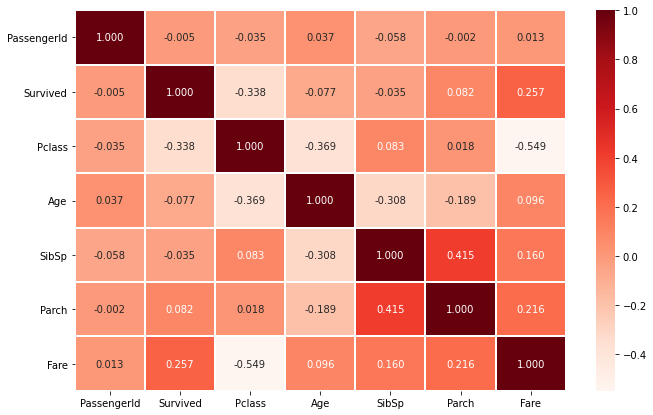

In [ ]:
plt.figure(figsize=(11, 7))
sns.heatmap(train_df.corr(), annot=True, fmt='.3f', linewidths=1, cmap='Reds')

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.describe(include='O') # include object type

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harrison, Mr. William",male,347082,G6,S
freq,1,577,7,4,644


## 각 항목별 생존률 비교

In [ ]:
def pie_chart(feature):
  feature_ratio = train_df[feature].value_counts(sort=False)
  feature_size = feature_ratio.size
  feature_index = feature_ratio.index
  survived = train_df[train_df['Survived'] == 1][feature].value_counts()
  dead = train_df[train_df['Survived'] == 0][feature].value_counts()
  
  plt.plot(aspect='auto')
  plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
  plt.title(feature + '\'s ratio in total')
  plt.show()
  
  for i, index in enumerate(feature_index):
    plt.subplot(1, feature_size + 1, i + 1, aspect='equal')
    plt.pie([survived[index], dead[index]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
    plt.title(str(index) + '\'s ratio')
    
    plt.show()

In [ ]:
def bar_chart(feature):
  survived = train_df[train_df['Survived']==1][feature].value_counts()
  dead = train_df[train_df['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(9,5))

In [ ]:
# 성별에 따른 생존률
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


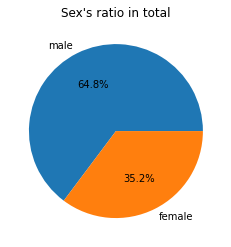

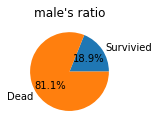

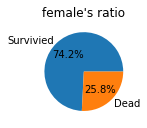

In [ ]:
pie_chart('Sex')

In [ ]:
# 티켓 클래스에 따른 생존률, 1이 가장 좋음
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


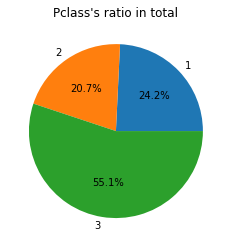

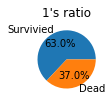

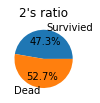

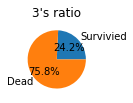

In [ ]:
pie_chart('Pclass')

In [ ]:
# 함께 탑승한 형제자매, 배우자의 수에 따른 생존률
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


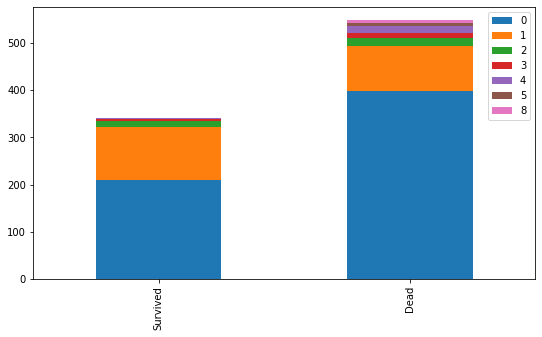

In [ ]:
bar_chart("SibSp")

In [ ]:
# 함께 탑승한 부모, 자녀의 수의 합에 따른 생존률
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


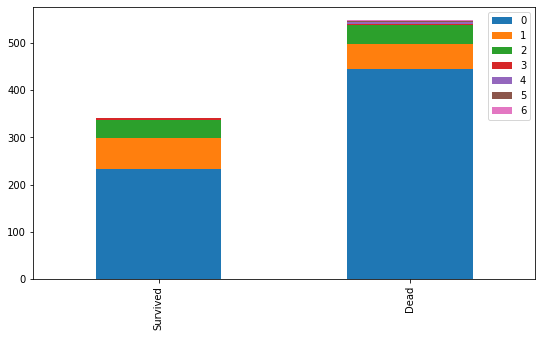

In [ ]:
bar_chart("Parch")

In [ ]:
# 배를 탄 탑승항구 = 언제 배를 탔는지에 따른 생존률
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


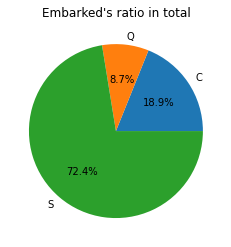

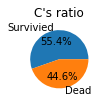

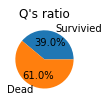

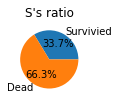

In [ ]:
pie_chart('Embarked')

In [ ]:
all_df = [train_df, test_df]
all_df

[     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
 0              1         0       3  ...   7.2500   NaN         S
 1              2         1       1  ...  71.2833   C85         C
 2              3         1       3  ...   7.9250   NaN         S
 3              4         1       1  ...  53.1000  C123         S
 4              5         0       3  ...   8.0500   NaN         S
 ..           ...       ...     ...  ...      ...   ...       ...
 886          887         0       2  ...  13.0000   NaN         S
 887          888         1       1  ...  30.0000   B42         S
 888          889         0       3  ...  23.4500   NaN         S
 889          890         1       1  ...  30.0000  C148         C
 890          891         0       3  ...   7.7500   NaN         Q
 
 [891 rows x 12 columns],      PassengerId  Pclass  ... Cabin Embarked
 0            892       3  ...   NaN        Q
 1            893       3  ...   NaN        S
 2            894       2  ...   NaN       

### 성별 0과 1로 변환

In [ ]:
for df in all_df:
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


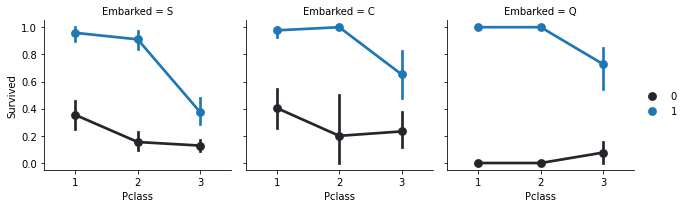

In [ ]:
# 티켓클래스과 성별에따른 생존률 비교
grid3 = sns.FacetGrid(train_df, col='Embarked')
grid3.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid3.add_legend()

In [ ]:
# 'S'로 빈값 채우고 숫자로 변환
common_Pclass = 'S'
train_df['Embarked'].fillna(common_Pclass, inplace=True)

train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test_df['Embarked'] = test_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [ ]:
train_df['Cabin'].describe()

count     204
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [ ]:
train_df['Cabin'].isna().sum()

687

In [ ]:
train_df['Cabin'].fillna('X', inplace=True)
test_df['Cabin'].fillna('X', inplace=True)

In [ ]:
train_df['Cabin'].value_counts()

X              687
B96 B98          4
C23 C25 C27      4
G6               4
F33              3
              ... 
D46              1
B80              1
B73              1
E77              1
C99              1
Name: Cabin, Length: 148, dtype: int64

In [ ]:
for df in all_df:
    df['Cabin'] = df['Cabin'].astype(str).str[0]

test_df['Cabin']

0      X
1      X
2      X
3      X
4      X
      ..
413    X
414    C
415    X
416    X
417    X
Name: Cabin, Length: 418, dtype: object

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


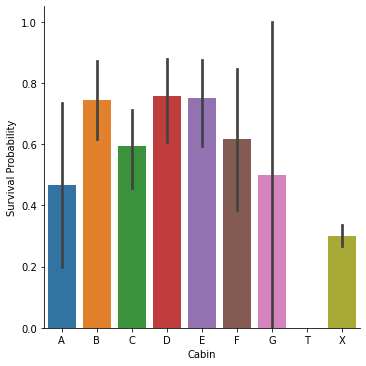

In [ ]:
g = sns.factorplot(y="Survived", x="Cabin", data=train_df, kind="bar", order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")

In [ ]:
train_df.groupby(['Survived', 'Cabin'])['PassengerId'].sum()

Survived  Cabin
0         A          3478
          B          5671
          C          8937
          D          3855
          E          3154
          F          2418
          G           458
          T           340
          X        217101
1         A          3116
          B         18854
          C         15043
          D         11851
          E         12924
          F          2397
          G           406
          X         87383
Name: PassengerId, dtype: int64

In [ ]:
for df in all_df:
    df.loc[(df['Cabin'] == 'A'), 'Cabin'] = 0
    df.loc[(df['Cabin'] == 'B'), 'Cabin'] = 1
    df.loc[(df['Cabin'] == 'C'), 'Cabin'] = 1
    df.loc[(df['Cabin'] == 'D'), 'Cabin'] = 1
    df.loc[(df['Cabin'] == 'E'), 'Cabin'] = 1
    df.loc[(df['Cabin'] == 'F'), 'Cabin'] = 0
    df.loc[(df['Cabin'] == 'G'), 'Cabin'] = 0
    df.loc[(df['Cabin'] == 'T'), 'Cabin'] = 2
    df.loc[(df['Cabin'] == 'X'), 'Cabin'] = 3

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,3,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,3,0


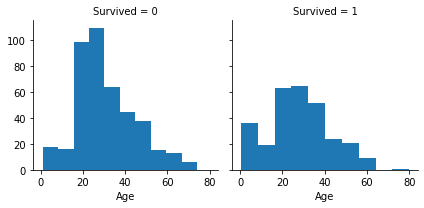

In [ ]:
grid1 = sns.FacetGrid(train_df, col='Survived')
grid1.map(plt.hist, 'Age')

In [ ]:
# Pclass x Sex를 기반으로 추측된 Age를 포함할 빈 배열을 준비합니다.
guess_df = np.zeros((3,2))
guess_df

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
for df in all_df:
    
    # generate a list of guesses of age
    for i in range(0,3):
        for j in range(0,2):
            guess = df[(df['Pclass']==i+1) & (df['Sex']==j)]['Age'].dropna()
            guess_df[i,j] = guess.median()
    
    # apply the guesses to the main data
    for i in range (0,3):
        for j in range (0,2):
            df.loc[(df['Age'].isna()) & (df['Pclass']==i+1) & (df['Sex']==j), 'Age'] = guess_df[i,j]
    
    df['Age'] = df['Age'].dropna().astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,3,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,3,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,3,0


In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df.groupby('AgeBand', as_index=False)['Survived'].mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [ ]:
# 나이에 따른 분류, 숫자로 표시
for df in all_df:
    df.loc[(df['Age'] <= 16), 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[(df['Age'] > 64), 'Age'] = 4

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,7.2500,3,0,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,71.2833,1,1,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,7.9250,3,0,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,53.1000,1,0,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,8.0500,3,0,"(32.0, 48.0]"


In [ ]:
train_df.groupby('Age', as_index=False)['Survived'].mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0,0.550000
1,1,0.337374
2,2,0.412037
3,3,0.434783
4,4,0.090909


In [ ]:
# 누락 확인
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
AgeBand        0
dtype: int64

In [ ]:
train_df.drop(['AgeBand'], axis=1, inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,7.8292,3,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,7.0000,3,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,9.6875,3,2
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,8.6625,3,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,12.2875,3,0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


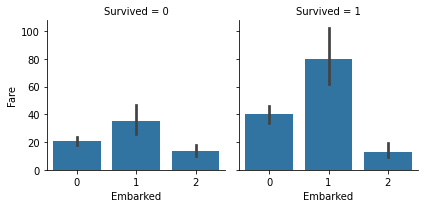

In [ ]:
# 탑승요금(Fare)과 선착장(Embarked) 관계
grid4 = sns.FacetGrid(train_df, col='Survived')
grid4.map(sns.barplot, 'Embarked', 'Fare')

In [ ]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
dtype: int64

In [ ]:
# 빈값에 평균값 넣기
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

In [ ]:
# 요금을 4등분하여 나눔
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df.groupby('FareBand', as_index=False)['Survived'].mean().sort_values('FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [ ]:
# 요금에 따른 분위 숫자로
for df in all_df:
    df.loc[df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31.0), 'Fare'] = 2
    df.loc[(df['Fare'] > 31.0), 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,3,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,1,1,"(31.0, 512.329]"
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,3,0,"(7.91, 14.454]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,1,0,"(31.0, 512.329]"
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,3,0,"(7.91, 14.454]"


In [ ]:
train_df.drop('FareBand', axis=1, inplace=True)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,2,0,0,330911,0,3,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,1,0,363272,0,3,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,0,0,240276,1,3,2
3,895,3,"Wirz, Mr. Albert",0,1,0,0,315154,1,3,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,1,3101298,1,3,0


In [ ]:
# Sibsp 과 Parch
for df in all_df:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

train_df.groupby('FamilySize', as_index=False)['Survived'].mean().sort_values('Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [ ]:
# 가족 규모에 따라 숫자로
for df in all_df:
    df['Family'] = 0
    df.loc[(df['FamilySize'] >= 5), 'Family'] = 1
    df.loc[(df['FamilySize'] > 1) & (df['FamilySize'] < 5), 'Family'] = 2

train_df.groupby('Family', as_index=False)['Survived'].mean().sort_values('Survived', ascending=False)

,Family,Survived
2,2,0.578767
0,0,0.303538
1,1,0.161290


In [ ]:
# 이름 판별
for df in all_df:
    title = df['Name'].apply(lambda x:x.split(',')[1].split('.')[0]).copy()
    df['Title'] = title.str.strip()

train_df.groupby(['Title', 'Survived'])['PassengerId'].count().sort_values(ascending=False)

Title         Survived
Mr            0           436
Miss          1           127
Mrs           1            99
Mr            1            81
Miss          0            55
Mrs           0            26
Master        1            23
              0            17
Rev           0             6
Dr            0             4
              1             3
Mlle          1             2
Jonkheer      0             1
Col           0             1
              1             1
Don           0             1
the Countess  1             1
Lady          1             1
Major         0             1
              1             1
Sir           1             1
Mme           1             1
Ms            1             1
Capt          0             1
Name: PassengerId, dtype: int64

In [ ]:
# 레이 이름과 오타? 통일
Rare = ['Lady','the Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer']

for df in all_df:
    df['Title'] = df['Title'].replace(Rare, 'Rare')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')

all_df = [train_df, test_df]    
train_df.groupby('Title', as_index=False)['Survived'].mean().sort_values('Survived', ascending=True)

,Title,Survived
2,Mr,0.156673
4,Rare,0.347826
0,Master,0.575000
1,Miss,0.702703
3,Mrs,0.793651


In [ ]:
# 이름별 숫자로
title_map = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Rare": 4}

for df in all_df:
    df['Title'] = df['Title'].map(title_map)
    df['Title'] = df['Title'].fillna(0)
    df['Title'] = df['Title'].astype(int)

all_df = [train_df, test_df]    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,A/5 21171,0,3,0,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,PC 17599,3,1,1,2,2,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,STON/O2. 3101282,1,3,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,113803,3,1,0,2,2,2
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,373450,1,3,0,1,0,0


In [ ]:
train_df.drop(['Name', 'Ticket'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket'], axis=1, inplace=True)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Family,Title
0,892,3,0,2,0,0,0,3,2,1,0,0
1,893,3,1,2,1,0,0,3,0,2,2,2
2,894,2,0,3,0,0,1,3,2,1,0,0
3,895,3,0,1,0,0,1,3,0,1,0,0
4,896,3,1,1,1,1,1,3,0,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,1,3,0,1,0,0
414,1306,1,1,2,0,0,3,1,1,1,0,0
415,1307,3,0,2,0,0,0,3,0,1,0,0
416,1308,3,0,1,0,0,1,3,0,1,0,0


## 모델 예측

In [ ]:
y_train = train_df['Survived']

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family', 'SibSp', 'Parch', 'Title', 'Cabin']

x_train = train_df[features].astype(float)
x_test = test_df[features].astype(float)

In [ ]:
x_train

,Pclass,Sex,Age,Fare,Embarked,Family,SibSp,Parch,Title,Cabin
0,3.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,3.0
1,1.0,1.0,2.0,3.0,1.0,2.0,1.0,0.0,2.0,1.0
2,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
3,1.0,1.0,2.0,3.0,0.0,2.0,1.0,0.0,2.0,1.0
4,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
886,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,3.0
887,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0
888,3.0,1.0,1.0,2.0,0.0,2.0,1.0,2.0,1.0,3.0
889,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
x_test

,Pclass,Sex,Age,Fare,Embarked,Family,SibSp,Parch,Title,Cabin
0,3.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0
1,3.0,1.0,2.0,0.0,0.0,2.0,1.0,0.0,2.0,3.0
2,2.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,3.0
3,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
4,3.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...
413,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
414,1.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0
415,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
416,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import tensorflow as tf

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

optim = optimizers.Adam(learning_rate=0.005)
model.compile(optimizer = optim,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=100,batch_size=3)

Epoch 1/100
297/297 [==============================] - 1s 913us/step - loss: 0.6014 - accuracy: 0.6768
Epoch 2/100
297/297 [==============================] - 0s 961us/step - loss: 0.4290 - accuracy: 0.8055
Epoch 3/100
297/297 [==============================] - 0s 801us/step - loss: 0.4242 - accuracy: 0.8166
Epoch 4/100
297/297 [==============================] - 0s 928us/step - loss: 0.4317 - accuracy: 0.8203
Epoch 5/100
297/297 [==============================] - 0s 1ms/step - loss: 0.4325 - accuracy: 0.8232
Epoch 6/100
297/297 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8174
Epoch 7/100
297/297 [==============================] - 0s 957us/step - loss: 0.4295 - accuracy: 0.8199
Epoch 8/100
297/297 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 0.8274
Epoch 9/100
297/297 [==============================] - 0s 960us/step - loss: 0.3815 - accuracy: 0.8355
Epoch 10/100
297/297 [==============================] - 0s 979us/step - loss: 0

In [ ]:
y_test = model.predict(x_test).flatten()
y_test = (y_test>0.5).astype(int)

y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
result = pd.DataFrame({'PassengerId':range(892,1310),'Survived':y_test})
result

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
result.to_csv("predict_result_final.csv", index=False, header=True)